Aprendizaje Batch
===

* 6:00 min | Ultima modificación: Marzo 29, 2021 | [YouTube]

## Definición del problema de etsimación de parámetros

Se desean encontra los parámetros $w_0$ y $w_1$ del siguiente modelo de regresión entre las variables $x$ y $y$:

$$y_i = w_1 x_i + w_0 + e_i$$

a partir de un conjunto de observaciones $\{d_i, x_i\}$, donde $d_i$ es el valor real (observado), $y_i$ es su aproximación usando el modelo de regresión descrito, y $e_i$ es el error.

## Función de pérdida y su derivada

El promedio de errores al cuadrado es definido como:

$$\text{SSE}(w_0, w_1) = \sum_i (d_i - y_i)^2$$

Si se tiene en cuenta que el error instantáneo se define como:

$$
e_i = d_i - y_i
$$

la ecuación anterior se puede reescribir como:

$$
\begin{split}
\text{SSE}(w_0, w_1) & = \sum_p (d_i - y_i)^2 \\
    & =  \sum_p e_i^2
\end{split}
$$

De acuerdo con el método del gradiente:

$$
\mathbf{w}_k 
  = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}^2(\mathbf{w}_{k-1})
$$

donde $\mathbf{w} = [w_0, w_1]$.

## Aprendizaje Batch (usando el gradiente descendente)

El término aprendizaje batch se refiere al uso de la ecuación anterior para el cómputo de la mejora de los parámetros actuales, la cual puede ser reescrita como:

$$
\begin{split}
\mathbf{w}_k 
  & = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}^2(\mathbf{w}_{k-1}) \\
  & = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \sum_i (d_i - y_i)^2 \\
  & = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \sum_i e_i^2  \\
  & = \mathbf{w}_{k-1} - \mu \sum_i \frac{\partial}{\partial \mathbf{w}}  e_i^2  
\end{split}
$$


Si $e_i$ es el error instantáneo, entonces:

$$
\frac{\partial}{\partial \mathbf{w}}  e_i^2
$$

es el gradiente instantáneo (computado en el punto $i$ actual).

La ecuación

$$
\mathbf{w}_k = \mathbf{w}_{k-1} - \mu \sum_i \left( \frac{\partial}{\partial \mathbf{w}}  e_i^2 \right)
$$

implica que:

* Se recorre el conjunto de datos computando el gradiente instantáneo para cada punto $i$.

* Se computa la sumatoria de grdientes instantáneos.

* Se realiza la corrección del vector de parámetros $\mathbf{w}_k$. 

El método recibe su nombre debido al hecho de que en cada iteración realiza la corrección de los parámetros, luego de recorrer un __*batch*__ de datos.

## Derivadas

$$
\begin{split}
    \frac{\partial}{\partial w_0} \text{SSE}(w_0, w_1) 
        & = -2 \sum_i e_i \\
\end{split}
$$

$$
\begin{split}
    \frac{\partial}{\partial w_1} \text{SSE}(w_0, w_1) 
        & = -2 \sum_i e_i x_i \\
\end{split}
$$

## Ejemplo numérico

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [1]:
#
# Datos del problema
#
x_sample = [
    0.6231,
    0.7460,
    0.1087,
    0.3654,
    0.3065,
    0.6886,
    0.4966,
    0.2618,
    0.7607,
    0.4424,
    0.7731,
]

y_sample = [
    1.6266,
    1.8508,
    0.9519,
    1.2828,
    1.2283,
    1.8722,
    1.4657,
    1.1097,
    1.7826,
    1.4267,
    1.8248,
]

In [1]:
#
# Sumatoria del error cuadrático o pérdida cuadrática
#
def sse(w0, w1):
    y_forecasts = [w0 + w1 * x_value for x_value in x_sample]
    errors = [y_true - y_forecast  for y_true, y_forecast in zip(y_sample, y_forecasts)]
    squared_errors = [error ** 2 for error in errors]
    return sum(squared_errors)

In [1]:
#
# Función auxililar para graficar el contorno
#
def plot_contour():

    W0 = np.linspace(-0.5, 1.5, 50)
    W1 = np.linspace(1.5, 3.5, 50)
    W0, W1 = np.meshgrid(W0, W1)
    F = compute_SSE(W0, W1)

    levels = [0, 0.2, 0.5, 0.75, 1, 2, 3, 5, 10, 20, 40, 60]

    _, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect("equal", "box")
    ax.contourf(W0, W1, F, cmap=cm.Greys, levels=levels, alpha=0.8)
    ax.contour(W0, W1, F, colors="gray", levels=levels)
    ax.grid()

In [2]:
def compute_instant_gradients_SSE(w0, w1):
    
    instant_errors = [
        (d_value - w0 - w1 * x_value) for x_value, d_value in zip(x_values, d_values)
    ]
    
    instant_gradients_SSE_w0 = [-2 * error for error in instant_errors]
    
    instant_gradients_SSE_w1 = [
        -2 * error * x_value for (error, x_value) in zip(instant_errors, x_values)
    ]
    
    return instant_gradients_SSE_w0, instant_gradients_SSE_w1

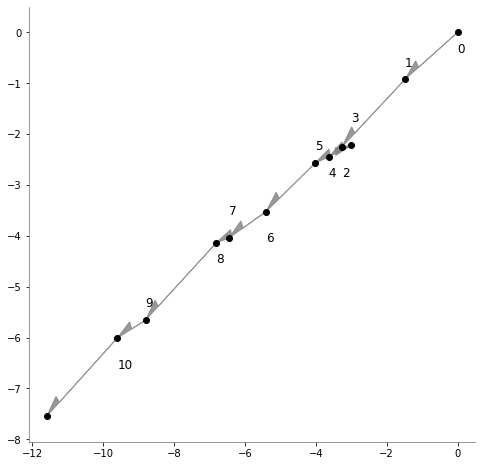

In [3]:
def plot_instant_gradient():

    #
    # Punto de inicio
    #
    w0 = 0.5
    w1 = 3.0

    #
    # Gradientes instantáneos en el punto de inicio
    #
    instant_gradients_SSE_w0, instant_gradients_SSE_w1 = compute_instant_gradients_SSE(
        w0, w1
    )

    x0 = 0
    y0 = 0
    xlim = -0.5, 0.5
    ylim = -0.5, 0.5

    plt.figure(figsize=(8, 8))

    text_levels = [-0.2, 0.2, -0.4, 0.4] * len(instant_gradients_SSE_w0)

    for i_point, (gradient_w0, gradient_w1) in enumerate(
        zip(instant_gradients_SSE_w0, instant_gradients_SSE_w1)
    ):

        plt.text(
            x0,
            y0 + text_levels[i_point],
            str(i_point),
            va="bottom" if text_levels[i_point] > 0 else "top",
            ha="left",
            fontsize=12,
        )

        plt.arrow(
            x=x0,
            y=y0,
            dx=-gradient_w0,
            dy=-gradient_w1,
            shape="left",
            head_width=0.3,
            color="gray",
            length_includes_head=True,
            linewidth=1,
            alpha=0.8,
        )

        plt.plot(x0, y0, "o", c="k")

        x0 -= gradient_w0
        y0 -= gradient_w1

        xlim = min(xlim[0], x0 - 0.5), max(xlim[1], x0 + 0.5)
        ylim = min(ylim[0], y0 - 0.5), max(ylim[1], y0 + 0.5)


    net_gradient_SSE_w0 = sum(instant_gradients_SSE_w0)
    net_gradient_SSE_w1 = sum(instant_gradients_SSE_w1)

    plt.plot(
        -net_gradient_SSE_w0,
        -net_gradient_SSE_w1,
        'ok',
    )

    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.gca().set_aspect("auto")

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    plt.show()
    
    
#
# Gráfica de la suma del gradiente instantáneo
# computado para cada patrón de entrenamiento en 
# el punto inicial (w0, w1) = (0.5, 3.0).
#
# La dirección del gradiente es el vector entre
# el punto 0 y la última flecha.
# 
plot_instant_gradient()

## Ecuación de mejora

$$
\mathbf{w}_k = \mathbf{w}_{k-1} - \mu \sum_i \left( \frac{\partial}{\partial \mathbf{w}}  e_i^2 \right)
$$

In [4]:
def compute_iteration(w0, w1, learning_rate):

    instant_gradients_SSE_w0, instant_gradients_SSE_w1 = compute_instant_gradients_SSE(
        w0, w1
    )

    net_gradient_SSE_w0 = sum(instant_gradients_SSE_w0)
    net_gradient_SSE_w1 = sum(instant_gradients_SSE_w1)

    w0 = w0 - learning_rate * net_gradient_SSE_w0
    w1 = w1 - learning_rate * net_gradient_SSE_w1

    return w0, w1

## Proceso iterativo

 w0 = 0.5813
 w1 = 1.7843
SSE = 0.1055



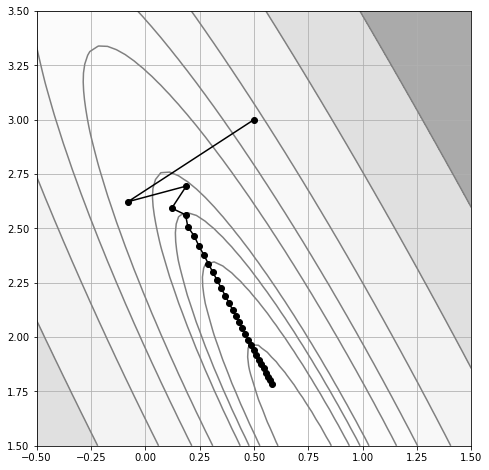

In [11]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history_w0 = [w0]
history_w1 = [w1]
history_f = [compute_SSE(w0, w1)]



for epoch in range(30):
    w0, w1 = compute_iteration(w0, w1, 0.05)
    history_w0.append(w0)
    history_w1.append(w1)
    history_f.append(compute_SSE(w0, w1))

print(" w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}\n".format(w0, w1, compute_SSE(w0, w1)))

plot_contour()
plt.plot(history_w0, history_w1, marker='o', color="black");